# Classification of Handwritten Digits

** Description about MNIST data **

MNIST data is a set of 70,000 small images of handwritten digits by students and employees. Each data point represents a set of labelled images represnting a digit. MNIST is the most studied dataset for a classification model.

** Getting the MNIST data set **

sklearn has modules to download wellknown datasets including MNIST data set

In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

Dataset from sklearn usually has dictionary datastructure where'DESCR' key has Description as a value, 'COL_NAMES' has column names as a value, 'data'has array of features and data points as values and 'target' has labels.

In [3]:
X = mnist['data']
y = mnist['target']
y

array([ 0.,  0.,  0., ...,  9.,  9.,  9.])

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
y = y.reshape(70000,1)

In [7]:
y.shape

(70000, 1)

**Let us analyze the data by converting the data into data frames**


In [8]:
import pandas as pd
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

Analyzing input data: Input data has 784 features representing 28*28 pixel of each datapoint.
There are about 7000 such datapoints meaning 7000 images. Each feature has values from 0 to 255, 0 representing white & 255 representing black

In [9]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 52.3 MB


In [10]:
X_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


Analyzing labels: output labels has 7000 datapoints each having vales from 0 to 9 representing digits.

In [11]:
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 1 columns):
0    70000 non-null float64
dtypes: float64(1)
memory usage: 547.0 KB


In [12]:
y_df.describe()

,0
count,70000.000000
mean,4.452429
std,2.890195
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


** Getting data from yann lecunn dataset** 

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [13]:
import idx2numpy

**Extract Training data**

In [14]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

In [15]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
X_train.shape

(60000, 784)

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train.shape

(60000,)

**Extract Test data**

In [19]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')

In [20]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
X_test.shape

(10000, 784)

In [22]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [23]:
y_test.shape

(10000,)

**Function to display a digit image from one 1-d representation of pixels**

In [24]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

def display(image,label):
    """image is a 1*784 numpy array"""
    image = image.reshape(28,28)
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation="nearest")
    plt.title("Image Representation for %d" %(label))
    plt.show()

**Displaying a set of digits **

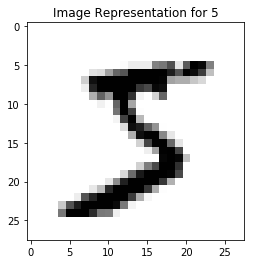

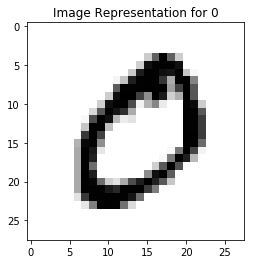

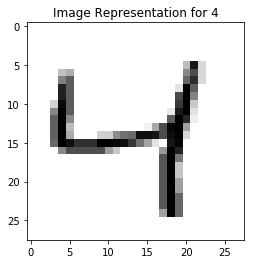

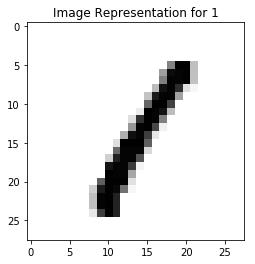

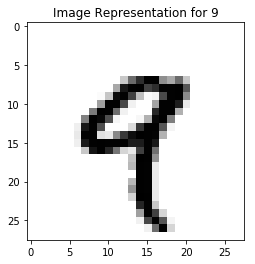

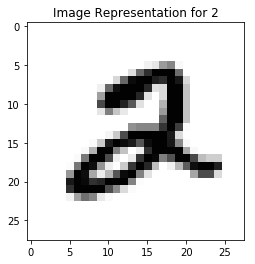

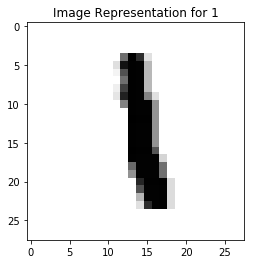

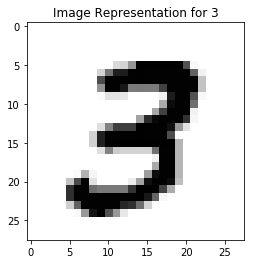

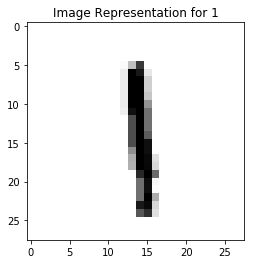

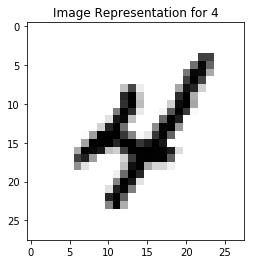

In [25]:
for i in range(10):
    display(X_train[i],y_train[i])

Select a linear model(Logistic regression) & evaluate the performance of the model using cross validation

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
log_clf = LogisticRegression(random_state=0,max_iter=5)

y_train_pred = cross_val_predict(log_clf, X_train, y_train, cv=3)
log_clf.fit(X_train, y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

y_train_pred is the predicted values in the train set such that the model has never seen the data before

In [27]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_train, y_train_pred)

In [42]:
confusionMatrix

array([[5735,    1,   15,   11,   15,   26,   51,    7,   56,    6],
       [   1, 6540,   30,   21,    7,   34,    8,   12,   82,    7],
       [  43,   87, 5188,   95,  110,   22,   89,  113,  180,   31],
       [  38,   54,  154, 5323,   11,  208,   46,   81,  150,   66],
       [  12,   38,   43,    9, 5319,    8,   48,   10,   70,  285],
       [ 107,   54,   46,  306,   99, 4116,  149,   32,  382,  130],
       [  38,   21,   37,    6,   43,   77, 5638,    4,   50,    4],
       [  30,   74,   61,   23,   77,   10,    5, 5755,   24,  206],
       [  57,  219,   58,  157,   48,  252,   51,   39, 4869,  101],
       [  47,   38,   33,   98,  228,   57,    4,  210,   68, 5166]])

In [30]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

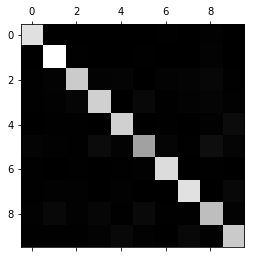

In [33]:
plt.matshow(confusionMatrix, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [36]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

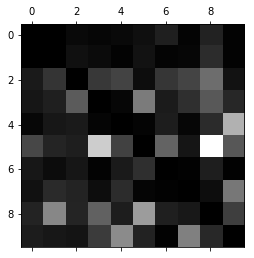

In [39]:
import numpy as np
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [48]:
y_test_pred = log_clf.predict(X_test)
y_test_pred

array([7, 2, 1, ..., 4, 8, 6], dtype=uint8)

In [49]:
confusionMatrix = confusion_matrix(y_test, y_test_pred)
confusionMatrix

array([[ 961,    0,    1,    1,    0,    0,   10,    2,    5,    0],
       [   0, 1106,    2,    3,    1,    1,    4,    2,   16,    0],
       [   9,   12,  902,   16,   11,    1,   13,   17,   46,    5],
       [   3,    1,   21,  916,    1,   22,    4,   10,   24,    8],
       [   1,    4,    6,    1,  904,    1,    8,    1,   10,   46],
       [  16,    6,    4,   48,   16,  695,   25,   13,   58,   11],
       [   9,    3,    4,    1,   10,    9,  913,    2,    7,    0],
       [   2,   17,   20,    5,    9,    2,    1,  936,    4,   32],
       [  14,   18,    6,   24,   13,   30,   11,   15,  831,   12],
       [  11,    8,    3,   14,   49,   14,    0,   31,   11,  868]])

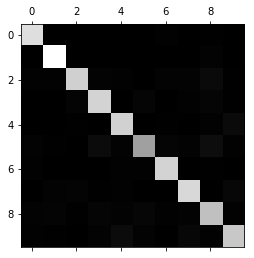

In [50]:
plt.matshow(confusionMatrix, cmap=plt.cm.gray)
#save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

In [51]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

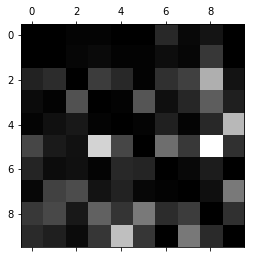

In [52]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
#save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
new_log_clf = LogisticRegression(random_state=0,max_iter=5)
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))


In [41]:
y_train_pred_scaled = cross_val_predict(new_log_clf, X_train_scaled, y_train, cv=3)
y_train_pred_scaled

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
confusionMatrix = confusion_matrix(y_train, y_train_pred_scaled)
confusionMatrix

array([[5735,    3,   21,   11,   20,   27,   51,    8,   40,    7],
       [   2, 6519,   36,   18,   10,   33,    8,   18,   89,    9],
       [  57,   94, 5232,  109,   76,   30,   87,   97,  147,   29],
       [  28,   56,  161, 5377,   21,  191,   28,   80,  122,   67],
       [  14,   43,   33,   11, 5402,   13,   45,   18,   55,  208],
       [  62,   42,   31,  191,   72, 4682,  123,   38,  120,   60],
       [  41,   33,   38,    8,   45,  104, 5598,    9,   38,    4],
       [  26,   62,   57,   27,   87,   17,    7, 5754,   15,  213],
       [  56,  221,   66,  155,   66,  166,   58,   28, 4920,  115],
       [  44,   34,   21,  107,  229,   50,    3,  231,   46, 5184]])

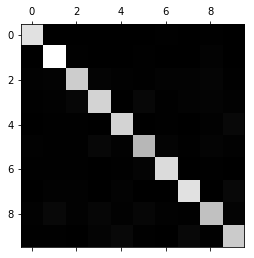

In [44]:
plt.matshow(confusionMatrix, cmap=plt.cm.gray)
plt.show()

In [45]:
row_sums = confusionMatrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusionMatrix / row_sums

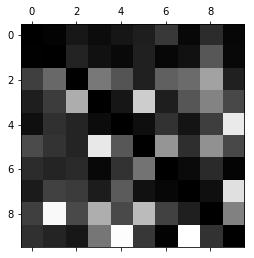

In [46]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [16]:
y_test_pred=log_clf.predict(X_test)

In [20]:
y_test_pred

array([7, 2, 1, ..., 4, 8, 6], dtype=uint8)